<center><strong><font size="5">특수문제연구-Selected Topics in Computer Science(대학원 수업) Assignment 1</font></strong></center>

1. [선형회귀] 다음 코드를 무엇을 의하는지 이해하고 실행하여 결과를 확인하세요.(17점)

(코드의 해석과 결과의 의미를 작성하세요.)

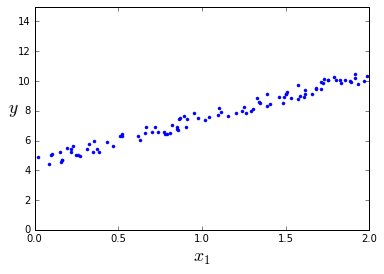

In [1]:
# libraries related

# for calculation of matrix 
import numpy as np

# To draw coordinate 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Input 
# reference of np.random.rand function is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
# numpy.random.rand means random values in a given shape over [0, 1)
x = 2 * np.random.rand(100,1) # in this case, x ranges over [0, 2) 
y = 4 + 3 * x + np.random.rand(100,1) # In this case, y ranges [4, 11)
# reference of mapplotlib is 
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
# plotting of each pair between x and y with blue point
plt.plot(x, y, "b.")
# label of x and y
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=1, fontsize=18)
plt.axis([0,2,0,15]) # 0,2 is the range of x values, 0, 15 is the range of y values
# print the plot on screen
plt.show()
# (1) 화면 출력 확인
# the picture below created y value with noise(np.random.rand(100,1))

In [2]:
### 정규 방성식(normal equation)을 사용한 선형회귀(linear regression) 접근 ####

# reference of numpy.ones is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
# numpy.ones means return a new array of give a shap and type 
# reference of numpy.c_ is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
# numpy.c_ means translating slice objects to concatenation along the second axis.
x_b = np.c_[np.ones((100,1)), x]
# for checking 
print("The shape(x_b): {}".format(x_b.shape))
x_b_T = x_b.T
print("The shape(x_b_T): {}".format(x_b.T.shape))
# reference of numpy.dot is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
# numpy.dot means dot prodcut of two arrays.
dot_x_b_T_n_x_b = x_b.T.dot(x_b)
inversion = np.linalg.inv(dot_x_b_T_n_x_b)
print("The shape(x_b.T.dot(x_b)): {}".format(dot_x_b_T_n_x_b.shape))
print("The shape(np.linalg.inv(dot_x_b_T_n_x_b)): {}".format(inversion.shape))
# reference of numpy.linalg.inv is
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html
# numpy.linalg.inv mean computing multiplicative inverse of a matrix
print("The shaep(y): {}".format(y.shape))
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("=== The result of np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) ===")
print("Like (inversion of (2 by 100 * 100 by 2))* 2 by 100 * 100 by 1")
print("sot the shaep of theta_best is 2 by 1\nSol>")
print(theta_best)
# (2) theta_best 출력 확인
# tetha_best mean intercept and coefficient
# 선형 회귀식의 계수와 Y 절편 계산

The shape(x_b): (100, 2)
The shape(x_b_T): (2, 100)
The shape(x_b.T.dot(x_b)): (2, 2)
The shape(np.linalg.inv(dot_x_b_T_n_x_b)): (2, 2)
The shaep(y): (100, 1)
=== The result of np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) ===
Like (inversion of (2 by 100 * 100 by 2))* 2 by 100 * 100 by 1
sot the shaep of theta_best is 2 by 1
Sol>
[[4.51195306]
 [2.97262111]]


In [3]:
x_new = np.array([[0],[2]])
print("The value(x_new): \n{}, the shape: {}".format(x_new, x_new.shape))
x_new_b = np.c_[np.ones((2,1)), x_new]
print("The value(x_new_b): \n{}, The shape: {}".format(x_new_b, x_new_b.shape))
y_predict = x_new_b.dot(theta_best)
print("The value(y_predict)\nSol>\n{}".format(y_predict))
# (3) y_predict 출력확인
# 선형회귀식을 통한 새로운 결과값 출력

The value(x_new): 
[[0]
 [2]], the shape: (2, 1)
The value(x_new_b): 
[[1. 0.]
 [1. 2.]], The shape: (2, 2)
The value(y_predict)
Sol>
[[ 4.51195306]
 [10.45719528]]


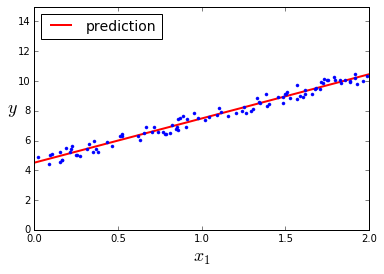

In [4]:
plt.plot (x_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()
# (4) 화면 출력 확인
# 선형 회귀선 출력 

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print("lin_reg.intercept_: {}".format(lin_reg.intercept_))
print("lin_reg.coef_: {}".format(lin_reg.coef_))
# (5) lin_reg.intercept_, lin_reg.coef_ 출력 확인
# 위에서 행렬 연산을 통해서 구한 것과 sklearn을 사용하여
# 회귀 분석과 결과가 동일하다. 

lin_reg.intercept_: [4.51195306]
lin_reg.coef_: [[2.97262111]]


In [6]:
# (6) lin_reg.predict(x_new)
# sklear을 이용한 선형회귀식을 이용한 새로운 입력 샘플의 
# 예측값과 위에서 구한 값과 비교 해봤을 때 같다.
print("lin_reg_predict(x_new):\n{}".format(lin_reg.predict(x_new)))

lin_reg_predict(x_new):
[[ 4.51195306]
 [10.45719528]]


In [7]:
# The reference of numpy.linalg.lstsq is 
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html
# Solves the equation a x = b 
# by computing a vector x that minimizes the Euclidean 2-norm || b - a x ||^2. 
# (7) theta_best_svd 출력 확인 
# 또 다른 방식의 선형 회귀식의 게수 및 Y 절편 계산 
theta_best_svd, residuals, rand, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
print("The theat_best svd:\n{}".format(theta_best_svd))

The theat_best svd:
[[4.51195306]
 [2.97262111]]


In [8]:
# The reference of numpy.linalg.pinv is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html
# (8) np.linalg.pinv(x_b).dot(y) 출력 확인
# 또 다른 선형 회귀식 구하는 방 pseudo-inverse와 singluar value decompoistion를 이용
print("np.linalg_pinv(x_b).dot(y): \n{}".format(np.linalg.pinv(x_b).dot(y)))

np.linalg_pinv(x_b).dot(y): 
[[4.51195306]
 [2.97262111]]


In [9]:
##### 경사 하강법(gradient descent)을 사용한 선형회귀 접근 #####

eta = 0.1 # learning rate
n_iterations = 1000 # traing interation
m = 100 # the number of sample
# The reference of npumpy.random.randn is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html
# It means returning a sample(or samples) from the "standard normal"
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta *gradients 

# (9) theta 출력 확인
# 선형 회귀식의 계수 및 Y 절편을 구함
print("The value(theta):\n{}".format(theta))

The value(theta):
[[4.51195306]
 [2.97262111]]


In [10]:
# (10) X_new_b.dot(theta) 출력확인
# 경사하강법을 이용하여 구한 선형회귀식에
# 새로운 입력에 대한 예측값
print("The val(x_new_b.dot(theta)):\n{}".format(x_new_b.dot(theta)))

The val(x_new_b.dot(theta)):
[[ 4.51195306]
 [10.45719528]]


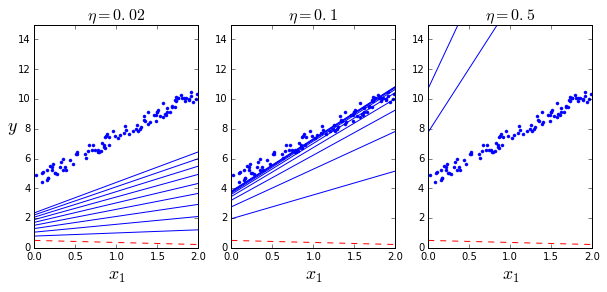

In [11]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(x_b) # the number of data
    plt.plot(x, y, "b.")
    n_iterations = 1000 # interation of training
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = x_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y) 
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()
# (11) 화면 출력 확인 
# 업데이트 하면서 선형 회귀식의 변화값 추정
# 또한 learning rate에 변화를 주면서 선형회귀식 추정 

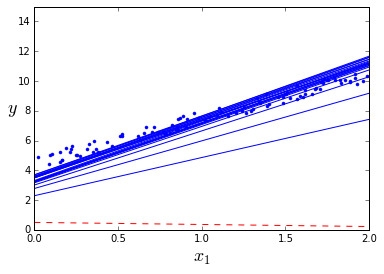

In [12]:
##### 스토캐스틱(stochastic gradient descent) 경사 하강법을 사용한 선형회귀 접근 ######

theta_path_sgd = []
m = len(x_b) #  the number of data
np.random.seed(42) # random number fixed
n_epochs = 50 # interation of total data 
t0, t1 = 5, 50 # learning rate ratio, gradually reducing  
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = x_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)
plt.plot(x,y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()
# (12) 화면 출력 확인
# 확률적 경사 하강법 즉, 데이터 하나씩 사용하면 선회 회귀식을 업데이트 

In [13]:
# (13) theta 출력확인
# 확률적 경사 하강법을 통한 선형 회귀식의 계수 및 Y 절편 계산
print("theta: \n{}".format(theta))

theta: 
[[4.51766874]
 [2.96145196]]


In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)

# (14) sgd_reg.fit(x, y.ravel()) 출력확인
# Sklearn's SGDRegressor's argument check
print("The sgd_reg.fit(x, y.ravel()): \n{}".format(sgd_reg.fit(x, y.ravel())))

The sgd_reg.fit(x, y.ravel()): 
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)


In [15]:
# (15) sgd_reg.intercept_, sgd_reg.coef_ 출력확인
# sklearn을 이용한 확률적 경사 하강법을 이용한 선형 회귀식 추론 결과의 
# 선형 회귀식의 계수 및 y 절편 
print("sgd_reg.intercept_: \n{}".format(sgd_reg.intercept_))
print("sgd_reg.coef_: \n{}".format(sgd_reg.coef_))

sgd_reg.intercept_: 
[4.50672178]
sgd_reg.coef_: 
[2.97122761]


In [16]:
##### Mini batch gradient descent(미니 배치 경사 하강법)을 사용한 선형회귀 접근 #####

theta_path_mgd = []
n_iteration = 50
minibatch_size = 20
np.random.seed(42)
theta - np.random.randn(2,1)
t0, t1 = 200, 1000

# learning rate gradually reduced
def learning_schedule(t):
    return t0/(t+t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(2)
    #print(shuffled_indices)
    #print(type(shuffled_indices))
    x_b_shuffled = x_b[shuffled_indices]
    #print(x_b[0:3])
    #print(x_b_shuffled[0:3])
    y_shuffled = y[shuffled_indices]
    for  i in range(0, m, minibatch_size):
        t += 1
        xi = x_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) -  yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
# (16) theta 출력 확인
# mini batch 정도의 데이터를 가지고 학습 한 후의 선형회귀식의 계수 와  y절편
print("The value(theta): \n{}".format(theta))

The value(theta): 
[[4.14475827]
 [3.13921767]]


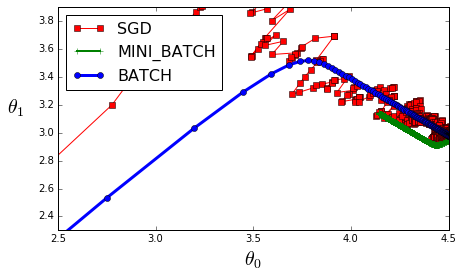

In [17]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 
         "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1],
         "g-+", linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1],
         "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$      ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
#(17) 화면 출력 확인
# full batch, mini batch, SGD 등의 선형 회귀식의 theta 변화량 비교

2.  [다차항회귀]  다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (6점)
(코드의 해석과 결과의 의미를 작성하세요)

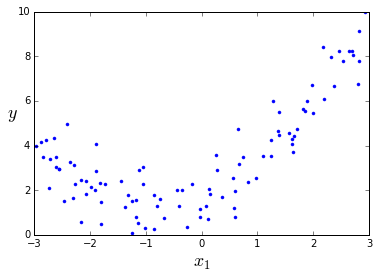

In [18]:
# libaries 
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * x **2 + x + 2 + np.random.randn(m, 1) 
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
# (1) 화면 출력 
# data 생성

In [19]:
# reference of PolynomialFeature is 
# http://scikit-learn.org/stable/modules/generated/\
# sklearn.preprocessing.PolynomialFeatures.html

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

# (2) x[0] 출력 확인
print("The value(x[0]): \n {}".format(x[0]))
print()
# (3) x_ploy[0] 출력 확인
print("The value(x_poly[0]):\n {}".format(x_poly[0]))

# sklearn을 이용한 Polynomial equationd의  
# polynomial and interaction features생성
# 다차항회귀를 위한 데이터 생성

The value(x[0]): 
 [-0.75275929]

The value(x_poly[0]):
 [-0.75275929  0.56664654]


In [20]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
# (4) lin_reg.intercept_, lin_reg_coef_  출력확인
# polynomial equation  회귀식의 계수 와  Y 절편 추론(bias)
print("The value(lin_reg.intercept_): {}".format(lin_reg.intercept_))
print("The value(lin_reg.coef_): {}".format(lin_reg.coef_))

The value(lin_reg.intercept_): [1.78134581]
The value(lin_reg.coef_): [[0.93366893 0.56456263]]


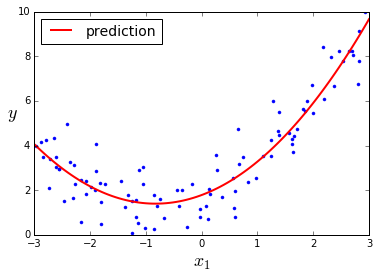

In [21]:
x_new = np.linspace(-3, 3, 100).reshape(100,1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()
# (5) 화면 출력 확인
# red line 이 추론된 다차항 회귀식 

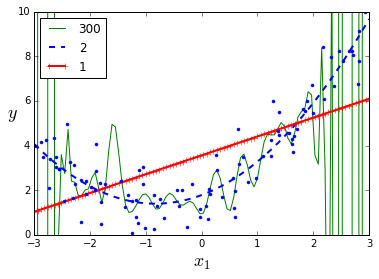

In [22]:
### reference of StandardScaler is 
## http://scikit-learn.org/stable/modules/\
# generated/sklearn.preprocessing.StandardScaler.html
# reference of Pipeline is
# http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-",1, 300),("b--",2,2),("r-+",2,1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(x, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
# (6) 화면 출력 확인
# 다차항 회귀식 즉  다항의 개수를 1, 2, 300개로 나누어
# sklearn을 이용한 각 구한 다차항 회귀식을 그림으로
# 아래와 같이 표현 갯수가 많으면 더욱더 곡선화 되는 경향이 있다.

3. [규제]  다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (2점)
(코드의 해석과 결과의 의미를 작성하세요.)

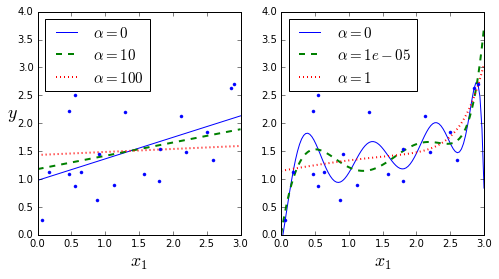

In [23]:
# libraries

# reference of Ridge is 
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# Ridge means Linear least squares with L2 regularization
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
x_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model)  
            ])
        model.fit(x, y)
        y_new_regul = model.predict(x_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(x_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(x, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()
# (1) 출력 확인
# L2 regularization과 함께 선형회귀와 다차항 회귀의 결과를 아래의 그림을 통해 보여 준다. 
# 왼쪽 그림은 선형 회귀, 오른쪽은 다차항 회귀이고, 
# 또한 선형과 다차항 뿐만 아니라  
# L2 regularization strength를 세개로 나누어 회귀식을 추론을 하는데
# 강하면 강할수록 overfitting 경향을 줄여준다.

4. 다음 훈련집합을 3차원 공간에 그리고, 선형 분리 가능 여부와 그 이유를 제시하시오.

[How to draw LaTex](https://tex.stackexchange.com/questions/69997/how-to-write-an-m%E2%A8%89n-matrix-in-latex)

[How to use LaTex from wiki](https://ko.wikipedia.org/wiki/LaTeX)

[How to use LaTex grammar from ko wiki](https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:TeX_%EB%AC%B8%EB%B2%95#%EB%B9%88%EC%B9%B8%EC%A1%B0%EC%A0%95)


\begin{align}
x_1 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} 
,x_2 = \begin{pmatrix} 0 \\ 1 \\ 1 \end{pmatrix} 
,x_3 = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} 
,x_4 = \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix} 
,x_5 = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} 
,x_6 = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} 
\end{align}

\begin{align}
y_1 = 1, y_2 = 1, y_3 = 1, y_4 = -1, y_5 = -1, y_6 = -1 
\end{align}


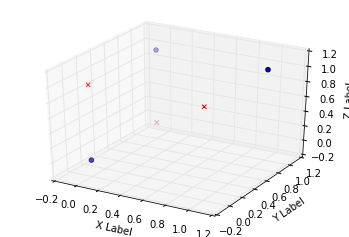

In [24]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# below is 1
x1 = [0, 0, 1]
y1 = [0, 1, 1]
z1 = [0, 1, 1]

# below  is -1 
x2 = [1, 0, 0]
y2 = [0, 0, 1]
z2 = [1, 1, 0]

# 3D plot's reference is 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# or https://matplotlib.org/gallery/mplot3d/scatter3d.html
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, y1, z1, c='b', marker='o')
ax.scatter3D(x2, y2, z2, c='r', marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label', rotation=1)
plt.show()

위 그림을 보면 두개의 집단으로 나눌 수 있는데 빨간 색의 x mark 와 파랑색의 o mark를 선형으로 분리하는 거는 불가능하다. 
그이유는 xor 연산에 대한 perceptron으로 선형 분리가 안되는 이유와 같다. 즉, 선형으로 분리를 한다면 두개의 hyperplane를 통해서 분리를 해야한다. 두개의 hyperplane 사이의 값 듯을 x로 나머지 부분은 o로 분리하도록 두개의 hyperplane을 사용하여 분리를 해야 한다. 

5. 
\begin{align}
A = \begin{pmatrix} 
1 && -2 && 3 && 5 \\
2 && 2 && -1 && 0 \\
3 && 0 && 1 && 2 \\
1 && 0 && 2 && 0  \end{pmatrix}의\enspace 2A,\enspace A^T,\enspace A^-1을\enspace쓰시오.\enspace 또한,\enspace A의\enspace 계수를\enspace 쓰시오.\enspace 더불어\enspace 행렬식,\enspace 고유\enspace 분해,\end{align} 특이값 분해도 쓰시오.(python 사용)

[how to use space in LaTex](https://tex.stackexchange.com/questions/74353/what-commands-are-there-for-horizontal-spacing)


In [25]:
import numpy as np
# inversion reference is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html
from numpy.linalg import inv
# matrix rank reference is
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_rank.html
from numpy.linalg import matrix_rank
# reference of the determinant of matrix is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.det.html
from numpy.linalg import det
# reference of the eigen decomposition of matrix is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html
from numpy.linalg import eig
# reference of the SVD(singular value decompostion) of matrix is 
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html
from numpy.linalg import svd

a = [[1, -2, 3, 5],
    [2, 2, -1, 0], 
    [3, 0, 1, 2],
    [1, 0, 2, 0]]

A = np.array(a)

print("=============== A matrix ==============")
print(A)
print("=============== 2A matrix ==============")
print(2*A)
print("=============== A^T matrix ==============")
print(A.T)
print("=============== A^-1 matrix ==============")
print(inv(A))
print("=============== A rank(계수) ===============")
print(matrix_rank(A))
print("=============== det(A)(행렬식) ===============")
print(det(A))
print("=============== A eigen decomposition(고유값 분해) ===============")
w, v = eig(A)
print("w.shape: {}, v.shape: {}".format(w.shape, v.shape))
print("w(eigenvalues): \n{}".format(w))
print("v(The normalized  eigenvetors): \n{}".format(v))
print("the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].")
print("=============== A svd(singular value decomposition(특이값 분해) ===============")
U, s , Vh = svd(A)
print("U.shape: {}\nV.shape: {}\ns.shape: {}".format(U.shape, Vh.shape, s.shape))
print("U matrix: \n{}".format(U))
print("diagonal matrix: \n{}".format(s))
print("V matrix: \n{}".format(Vh))

=============== A matrix ==============
[[ 1 -2  3  5]
 [ 2  2 -1  0]
 [ 3  0  1  2]
 [ 1  0  2  0]]
=============== 2A matrix ==============
[[ 2 -4  6 10]
 [ 4  4 -2  0]
 [ 6  0  2  4]
 [ 2  0  4  0]]
=============== A^T matrix ==============
[[ 1  2  3  1]
 [-2  2  0  0]
 [ 3 -1  1  2]
 [ 5  0  2  0]]
=============== A^-1 matrix ==============
[[-0.23529412 -0.23529412  0.58823529 -0.05882353]
 [ 0.29411765  0.79411765 -0.73529412  0.32352941]
 [ 0.11764706  0.11764706 -0.29411765  0.52941176]
 [ 0.29411765  0.29411765 -0.23529412 -0.17647059]]
=============== A rank(계수) ===============
4
=============== det(A)(행렬식) ===============
34.00000000000001
=============== A eigen decomposition(고유값 분해) ===============
w.shape: (4,), v.shape: (4, 4)
w(eigenvalues): 
[ 5.52552524+0.j         -1.52204833+1.31733645j -1.52204833-1.31733645j
  1.51857142+0.j        ]
v(The normalized  eigenvetors): 
[[-0.68465996+0.j          0.619935  +0.j          0.619935  -0.j
   0.11199539+0.j        ]
 [-0

6. 놈(Norm)을 계산하시오.

(1)
\begin{align}
A = \begin{pmatrix} 
3 && -4 && -1.2 && 0 && 2.3 \end{pmatrix}^T의\enspace 1차,\enspace 2차,\enspace 3차,\enspace 놈과\enspace 최대\enspace 놈\end{align}

In [26]:
# numpy.norm reference is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
import numpy as np
from numpy.linalg import norm

a_T = [3, -4, -1.2, 0, 2.3]

A_T = np.array(a_T)

A = A_T.T

print("============== 1-norm =============")
print(norm(A, ord=1))
print("============== 2-norm =============")
print(norm(A, ord=2))
print("============== 3-norm =============")
print(norm(A, ord=3))
print("============= Max-norm ============")
print(norm(A, ord=np.inf))

============== 1-norm =============
10.5
============== 2-norm =============
5.632938842203065
============== 3-norm =============
4.716120891176797
============= Max-norm ============
4.0


(2)
\begin{align}
A = \begin{pmatrix} 
2 && 1 \\
1 && 5 \\
4 && 1 \end{pmatrix}의\enspace 프로베니우스\enspace 놈\end{align}

In [27]:
# numpy.norm reference is 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
import numpy as np
from numpy.linalg import norm

a = [[2, 1],
       [1, 5],
       [4, 1]]
A = np.array(a)

print("============== Frobenius norm =============")
print(norm(A, ord='fro'))

============== Frobenius norm =============
6.928203230275509


7. \[예제 2-3\]에서 T = 2.0으로 바뀌었다고 가정하고 \[그림 2-4(b)\]를 새로 그리시오. T가 변함에 따라 어떤 변화가 나타나는지 설명하시오.

frist distance from orignal point: 0.9996469776876233
second distance from orignal point: 1.168412475673972
third distance from orignal point: 1.752618713510958


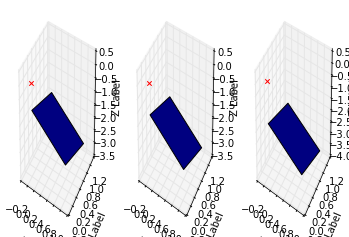

In [28]:
# the reference of draw plain is 
# https://stackoverflow.com/questions/3461869/\
# plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib/12503243
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm

# normal vector 
# arbitary point
w = np.array([1.2, 0.7, 1.0]) # direction x2 

# The distance between original point and plain 
# Reference is 
# http://mathworld.wolfram.com/Point-PlaneDistance.html
d = np.absolute(0.584*norm(w, ord=2))
print("frist distance from orignal point:", d)
# T = 2.0
T = 2.0
second_d = 2.0/norm(w, ord=2)
print("second distance from orignal point:", second_d)

third_d = 3.0/norm(w, ord=2)
print("third distance from orignal point:", third_d)
# Create x, y 
xx, yy = np.meshgrid(range(2), range(2))

# Caculate corresponding z
z = (-w[0] * xx - w[1] * yy - d) * 1. /w[2]

second_z = (-w[0] * xx - w[1] * yy - second_d) * 1. /w[2]


third_z = (-w[0] * xx - w[1] * yy - third_d) * 1. /w[2]

# plot the surface
plt3d = plt.figure()

ax = plt3d.add_subplot(131, projection='3d')
ax.plot_surface(xx, yy, z)

# original point
ax.scatter3D(0, 0, 0, c='r', marker='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ay = plt3d.add_subplot(132, projection='3d')
ay.plot_surface(xx, yy, second_z)

# original point
ay.scatter3D(0, 0, 0, c='r', marker='x')

ay.set_xlabel('X Label')
ay.set_ylabel('Y Label')
ay.set_zlabel('Z Label')

az = plt3d.add_subplot(133, projection='3d')
az.plot_surface(xx, yy, third_z)
# original point
az.scatter3D(0, 0, 0, c='r', marker='x')

az.set_xlabel('X Label')
az.set_ylabel('Y Label')
az.set_zlabel('Z Label')
plt.show()

위의 그림에서 확인을 할 수 있듯  T 가 커짐에 따라 결정 평편은 점점 원점으로 부터 멀어지고 있다. 

위의 그림에서 원점은 x이고 파란색이 결정 평면을 구한 것이다. 

위의 python code의 w는 weight 값으로 이 값은 결정 평면과 수식이고 즉 법선 벡터라고 볼 수 있다. 

또한 위의 그림에서는 원점으로 부터 아래의 수식 만큼 떨어져 있기 때문에 원점으로 부터 T 가 증가하면 평면은 멀어지고 작아지면 가까워 진다. 
\begin{align} T / ||W||_{2}\end{align}

8. 아래 그림은 x1과 x3 축이 이루는 평면이 결정평면인 상황이다. 이에 해당하는 퍼셉트론을  \[그림 2-4(a)\]처럼 제시하시오.

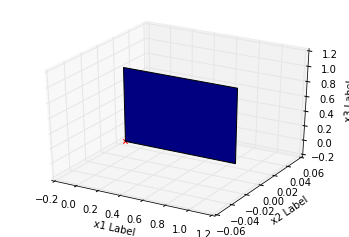

======== perceptron of plain above ================
          0
x1 ---O-----\
          1  \
x2 ---O--------O---- output
          0  / T=1.0
x3 ---O-----/


In [29]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm

x, z = np.meshgrid(range(2), range(2))
y = x*0

# plot the surface
plt3d = plt.figure().gca(projection='3d')

# original point
plt3d.scatter3D(0, 0, 0, c='r', marker='x')
plt3d.plot_surface(x, y, z)

plt3d.set_xlabel('x1 Label')
plt3d.set_ylabel('x2 Label')
plt3d.set_zlabel('x3 Label')
plt.show()

print("======== perceptron of plain above ================")
print("          0")
print("x1 ---O-----\\")
print("          1  \\")
print("x2 ---O--------O---- output")
print("          0  / T=1.0")
print("x3 ---O-----/")


위의 그림 x1과 x3의 결정 평면의 수직인 벡터인 w=(0,1,0)를 이용해서 \[그림 2-4(a)\]처럼 퍼셉트론을 그린 결과이다.  
아래의 수식은 그 퍼셉트론을 벡터 연산으로 표현한것이다. 

\begin{align}
t(W^Tx) = t(\begin{pmatrix} 0 && 1 && 0 \end{pmatrix}^T
\begin{pmatrix} x1 && x2 && x3 \end{pmatrix})\end{align} t는 비선형 함수

9. 다음의 함성함수에 대해 답하시오 
\begin{align}
\begin{matrix}
f(x) &=& 2(\frac{1}{4}(1-2x)^2-1)^3 - 3(\frac{1}{4}(1-2x)^2-1)^2 - 3\\
\end{matrix}\end{align}

(1) 식 (2.53)에 따라 i(x)와 h(x)를 쓰시오.

\begin{align}
\begin{matrix}
i(x) &=& 1-2x\\
\end{matrix}\end{align}

\begin{align}
\begin{matrix}
h(x) &=& \frac{1}{4}((1-2x)^2-1)\\
\end{matrix}\end{align}

(2) 연쇄법칙을 이용하여  f\`(x)를 구하시오.

\begin{align}
\begin{matrix}
f(x) &=& 2(h(i(x)))^3 - 3(h(i(x)))^2 - 3\\
\end{matrix}\end{align}

\begin{align}
\begin{matrix}
f'(x) &=& 2*3(\frac{1}{4}(1-2x)^2-1)^2(2x-1)- 3*2(\frac{1}{4}(1-2x)^2-1)(2x-1)\\
\end{matrix}\end{align}

or 

\begin{align}
\begin{matrix}
f'(x) &=& 2*3(\frac{1}{4}(1-2x)^2-1)(2x-1)((\frac{1}{4}(1-2x)^2-1) - 1)\\
\end{matrix}\end{align}

(3) f'(0)과 f'(2.1)를 계산하시오.

\begin{align}
\begin{matrix}
f'(0) &=& -\frac{63}{8}\\
      &=& -7.875
\end{matrix}\end{align}

\begin{align}
\begin{matrix}
f'(2.1) &=& \frac{838656}{50000}\\
        &=& 16.773120000000024
\end{matrix}\end{align}

In [30]:
def f_derivative(x):
    a = 1-2*x
    b = 6*((1/4)*(a**2)-1)*(-1*a)
    c = ((1/4*(a**2))-1)-1
    return b*c

print("f'(0): {}".format(f_derivative(0.0)))
print("f'(2.1): {}".format(f_derivative(2.1))) 

f'(0): -7.875
f'(2.1): 16.773120000000024


10. 다음 함수에 대해 답하시오.

\begin{align}
\begin{matrix}
f(x_1, x_2) &=& 2x_1^2 + 3x_1x_2 + 2X_2^2 - 4x_1 + 2x_2 -24
\end{matrix}
\end{align}

(1) 최소점과 최솟값을 분석적으로 구하시오. 

\begin{align}
\begin{matrix}
df(x_1, x_2)/dx_1 &=& 4x_1 + 3x_2 - 4 
\end{matrix}
\end{align}


\begin{align}
\begin{matrix}
df(x_1, x_2)/dx_2 &=& 3x_1 + 4x_2 + 2
\end{matrix}\end{align}

최소점은 아래의 두식을 만족하는 x1와 x2이다. 

\begin{align}
\begin{matrix}
df(x_1, x_2)/dx_1 &=& 0 \\
df(x_1, x_2)/dx_2 &=& 0
\end{matrix}\end{align}


위의 두식에 대하여 아래와 같은 연립방정식을 풀면 

\begin{align}
\begin{matrix}
g1(x_1, x_2) &:& 4x_1 + 3x_2 - 4 &=& 0\\
g2(x_1, x_2) &:& 3x_1 + 4x_2 + 2 &=& 0\end{matrix}\end{align}

최소점은 아래와 같다. 

\begin{align}
\begin{matrix}
x_1 &=& \frac{22}{7} &=& 3.142857142857143 \\
x_2 &=& -\frac{20}{7} &=& -2.857142857142857\end{matrix}\end{align}

위의 최소점을 바탕으로 최솟값은 

\begin{align}
\begin{matrix}
f(\frac{22}{7}, -\frac{20}{7}) &=& 2(\frac{22}{7})^2 + 3(\frac{22}{7})(-\frac{20}{7}) + 2(-\frac{20}{7})^2 - 4(\frac{22}{7}) + 2(-\frac{20}{7}) -24 \\
&=& -33.14285714285714
\end{matrix}\end{align}


(2) 난수를 생성하여 초깃값 \begin{align}
x_0 = \begin{pmatrix}
1.0 && 0.9
\end{pmatrix}^T\end{align}를 얻었다고 가정하고, 식(2.58)을 연속적으로 적용하여 얻는 점 x1, x2, x3을 구하시오. 이때 학습률 p = 0.1을 사용하시오. (1)에서 구한 최소점을 향해 이동하는지 확인하시오.

In [31]:
import numpy as np

p = 0.1

def function(x_coordinate):
    a = 2*(x_coordinate[0]**2) + 3*x_coordinate[0]*x_coordinate[1] 
    b = 2*(x_coordinate[1]**2) - 4*x_coordinate[0] +2*x_coordinate[1] -24
    return  a+b


def gradient(x_coordinate):
    a = 4*x_coordinate[0] + 3*x_coordinate[1] - 4
    b = 3*x_coordinate[0] + 4*x_coordinate[1] + 2
    return a, b

x_0 = np.array([1.0, 0.9])
f_x0 = function(x_0)
gradient_x0 = np.array(gradient(x_0))

x_list = [x_0]
for i in range(35):
    grad = np.array(gradient(x_list[i]))
    x_list.append(x_list[i] - p*grad)
    if i <= 3 or i%5 == 0:
        print("====== check =======")
        print("idx: {}, [x1, x2]: {}".format(i, x_list[i]))
        print("f(x1, x2): {}".format(function(x_list[i])))
        print("grad({}): {}, p*grad: {}".format(i,grad, p*grad))

====== check =======
idx: 0, [x1, x2]: [1.  0.9]
f(x1, x2): -19.88
grad(0): [2.7 8.6], p*grad: [0.27 0.86]
====== check =======
idx: 1, [x1, x2]: [0.73 0.04]
f(x1, x2): -25.6834
grad(1): [-0.96  4.35], p*grad: [-0.096  0.435]
====== check =======
idx: 2, [x1, x2]: [ 0.826 -0.395]
f(x1, x2): -27.396208
grad(2): [-1.881  2.898], p*grad: [-0.1881  0.2898]
====== check =======
idx: 3, [x1, x2]: [ 1.0141 -0.6848]
f(x1, x2): -28.514667340000003
grad(3): [-1.998   2.3031], p*grad: [-0.1998   0.23031]
====== check =======
idx: 5, [x1, x2]: [ 1.402873 -1.113236]
f(x1, x2): -30.108456089434
grad(5): [-1.728216  1.755675], p*grad: [-0.1728216  0.1755675]
====== check =======
idx: 10, [x1, x2]: [ 2.11426051 -1.82853669]
f(x1, x2): -32.084836306123705
grad(10): [-1.02856804  1.02863476], p*grad: [-0.1028568   0.10286348]
====== check =======
idx: 15, [x1, x2]: [ 2.53547831 -2.24976401]
f(x1, x2): -32.77394808796707
grad(15): [-0.60737876  0.60737892], p*grad: [-0.06073788  0.06073789]
====== check 

위의 출력결과에서 확인을 할 수 있듯이 x1 = (0.73, 0.04), x2 = (0.826, -0.395), x3 = (1.0141, -0.6848)로 점차 변하고 좀더 연속적으로 계산을 하면 위의 (1)에서 구한 최소점으로 가고 점차 실제 함수 값도 최솟값으로 가는 경향을 확인을 할 수 있다. 


11. (10 점) 몬티홀 Monty Hall 게임 쇼에서 참가자들은 다음과 같은 결과를 말하고 있다. 

1, 2, 3번이 붙어 있는, 세개의 문이 있다. 한개의 상품이 세개의 문뒤에 있다. 하나의 문을 선택할 수 있으며, 처음에 선택된 상품이 드러나지 않게 문을 열 것이다. 예를 들어 당신이 1번 문을 처음에 선택한다면 그는 2번과 3번 중 하나를 열고, 그가 선택해서 열리는 문에는 상품이 나타나지 않을 것이다. 

여기서 진행자는 당신은 새롭게 문을 선택할 수 있도록 할 것이다. 당신은 처째 선택을 그대로 유지할 수 있거나, 다른 닫힌 무으로 선택을 바꿀 수 있다. 모든 문이 열리고 당신이 마지막으로 선택한 문뒤에 무엇이 있는지 확인한다. 

- 참가자는 처음에 1번 문을 선택한다고 가정하며, 게임 진행자는 3번 문을 열고 문 뒤에 아무것도 없을 보장한다. 참가자는 (a) 1번 문에 머물거나, ( b) 2번 문으로 변경, 또는 (c) 무엇이든 상관이 없다. 어느 전략이 좋은지 제시하시오. 

처음 상품이 3개의 문 뒤에 동일하게 있다고, 가정하며, 베이즈 규칙을 사용하라. 

sol> 아래는 이 문제를 풀기위해 정의한 것이다. 

y 는 방번호 = {1, 2, 3}
x 는 상품 존재 유 무 = {상품, No-상품}

각 방에 상품이 있을 확률은 같으므로 아래와 같다. 

p(y=1)=p(y=2)=p(y=3) = 1/3

사회자가 문을 참가자 선택한 것외에 문을 열 확률은 1/2이다. 

문제를 접근을 하는 방식은 전체적으로 사후 확률인 P(y=1|사회자가 문 3 open)을 구한다면 아래와 같다.  

P(y=1|사회자가 문 3 open) = p(사회자가 문 3 open|y=1) * p(y=1) / P(사회자가 문 3 open)  = 1/3

즉 1번문 뒤에 상품이 있을 확률은 1/3이기 때문에 2번 뒤에 상품이 있을 확률은 2/3(1-1/3)므로 

"(b) 2번 문으로 변경"을 하는 경우의 전략이 더 좋은 전략이다. 